# Driver Performance Prediction
## Extract Data

In [1]:
# pip install pandas
# pip install matplotlib
# pip install sqlite3
# pip install kaggle
# move kaggle.json file into ~/.kaggle (mac) or C:\Users<Windows-username>.kaggle\kaggle.json (windows)

import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as db

dataset = "rohanrao/formula-1-world-championship-1950-2020"

kaggle.api.dataset_download_files(dataset, path='./', unzip=True)

print(f"Dataset {dataset} downloaded successfully!")

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
Dataset rohanrao/formula-1-world-championship-1950-2020 downloaded successfully!


In [2]:
results_df = pd.read_csv('results.csv')
qualifying_df = pd.read_csv('qualifying.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
driver_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
constructors_df = pd.read_csv('constructors.csv')
constructors_standings_df = pd.read_csv('constructor_standings.csv')
status_df = pd.read_csv('status.csv')

## Transform Data
Changing data types, dropping and renaming columns

In [3]:
results_df.drop(['number', 'positionText', 'time', 'rank', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'laps', 'points', 'positionOrder'], axis=1, inplace=True)

results_df.rename(columns={'position': 'final_position', 'grid': 'starting_grid'}, inplace=True)

results_df['final_position'] = results_df['final_position'].replace('\\N', np.nan)
results_df.final_position = pd.to_numeric(results_df.final_position, errors='coerce')
results_df.milliseconds = pd.to_numeric(results_df.milliseconds, errors='coerce')
print(results_df.dtypes)
display(results_df)

resultId            int64
raceId              int64
driverId            int64
constructorId       int64
starting_grid       int64
final_position    float64
milliseconds      float64
statusId            int64
dtype: object


,resultId,raceId,driverId,constructorId,starting_grid,final_position,milliseconds,statusId
0,1,18,1,1,1,1.0,5690616.0,1
1,2,18,2,2,5,2.0,5696094.0,1
2,3,18,3,3,7,3.0,5698779.0,1
3,4,18,4,4,11,4.0,5707797.0,1
4,5,18,5,1,3,5.0,5708630.0,1
...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,18,16.0,NaN,12
26515,26521,1132,815,9,0,17.0,NaN,12
26516,26522,1132,855,15,14,18.0,NaN,12
26517,26523,1132,847,131,1,NaN,NaN,34


In [4]:
qualifying_df.drop(['number', 'q1', 'q2', 'q3', 'qualifyId'], axis=1, inplace=True)
qualifying_df.rename(columns={'position': 'qualifying_position'}, inplace=True)

print(qualifying_df.dtypes)
display(qualifying_df)

raceId                 int64
driverId               int64
constructorId          int64
qualifying_position    int64
dtype: object


,raceId,driverId,constructorId,qualifying_position
0,18,1,1,1
1,18,9,2,2
2,18,5,1,3
3,18,13,6,4
4,18,2,2,5
...,...,...,...,...
10249,1132,822,15,16
10250,1132,825,210,17
10251,1132,839,214,18
10252,1132,815,9,19


In [5]:
lap_times_df.drop(['time', 'lap', 'position'], axis=1, inplace=True)
lap_times_df.rename(columns={'milliseconds': 'lap_time_milliseconds'}, inplace=True)

print(lap_times_df.dtypes)
display(lap_times_df)

raceId                   int64
driverId                 int64
lap_time_milliseconds    int64
dtype: object


,raceId,driverId,lap_time_milliseconds
0,841,20,98109
1,841,20,93006
2,841,20,92713
3,841,20,92803
4,841,20,92342
...,...,...,...
575024,1131,858,70742
575025,1131,858,70855
575026,1131,858,72454
575027,1131,858,73607


In [6]:
pit_stops_df.drop(['duration', 'time', 'lap'], axis=1, inplace=True)
pit_stops_df.rename(columns={'milliseconds': 'stop_duration', 'stop':'pit_stop'}, inplace=True)

pit_stops_df.stop_duration = pd.to_numeric(pit_stops_df.stop_duration, errors='coerce')
print(pit_stops_df.dtypes)
display(pit_stops_df)

raceId           int64
driverId         int64
pit_stop         int64
stop_duration    int64
dtype: object


,raceId,driverId,pit_stop,stop_duration
0,841,153,1,26898
1,841,30,1,25021
2,841,17,1,23426
3,841,4,1,23251
4,841,13,1,23842
...,...,...,...,...
10985,1132,807,2,30265
10986,1132,840,2,29469
10987,1132,839,4,29086
10988,1132,815,4,28871


In [7]:
driver_standings_df.drop(['position','positionText','driverStandingsId'], axis=1, inplace=True)
driver_standings_df.rename(columns={'points': 'driver_points', 'wins': 'driver_wins'}, inplace=True)

print(driver_standings_df.dtypes)
display(driver_standings_df)

raceId             int64
driverId           int64
driver_points    float64
driver_wins        int64
dtype: object


,raceId,driverId,driver_points,driver_wins
0,18,1,10.0,1
1,18,2,8.0,0
2,18,3,6.0,0
3,18,4,5.0,0
4,18,5,4.0,0
...,...,...,...,...
34590,1132,839,3.0,0
34591,1132,842,6.0,0
34592,1132,822,0.0,0
34593,1132,858,0.0,0


In [8]:
driver_df['driver_name'] = driver_df['forename'] + ' ' + driver_df['surname']
driver_df.drop(['driverRef','number', 'code', 'dob', 'nationality', 'url', 'forename', 'surname'], axis=1, inplace=True)
driver_df.head()

,driverId,driver_name
0,1,Lewis Hamilton
1,2,Nick Heidfeld
2,3,Nico Rosberg
3,4,Fernando Alonso
4,5,Heikki Kovalainen


In [9]:
races_df.drop(['date','time', 'round','url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
races_df.rename(columns={'name': 'circuit_name'}, inplace=True)

print(races_df.dtypes)
display(races_df)

raceId           int64
year             int64
circuitId        int64
circuit_name    object
dtype: object


,raceId,year,circuitId,circuit_name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix
...,...,...,...,...
1120,1140,2024,32,Mexico City Grand Prix
1121,1141,2024,18,São Paulo Grand Prix
1122,1142,2024,80,Las Vegas Grand Prix
1123,1143,2024,78,Qatar Grand Prix


In [10]:
constructors_df.drop(['url', 'nationality', 'constructorRef'], axis=1, inplace=True)
constructors_df.rename(columns={'name': 'constructor_name'}, inplace=True)

print(constructors_df.dtypes)
display(constructors_df)

constructorId        int64
constructor_name    object
dtype: object


,constructorId,constructor_name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri
210,214,Alpine F1 Team


In [11]:
constructors_standings_df.drop(['constructorStandingsId', 'position', 'positionText', 'wins'], axis=1, inplace=True)
constructors_standings_df.rename(columns={'points': 'constructor_points'}, inplace=True)

print(constructors_standings_df.dtypes)
display(constructors_standings_df)

raceId                  int64
constructorId           int64
constructor_points    float64
dtype: object


,raceId,constructorId,constructor_points
0,18,1,14.0
1,18,2,8.0
2,18,3,9.0
3,18,4,5.0
4,18,5,2.0
...,...,...,...
13266,1132,15,0.0
13267,1132,210,27.0
13268,1132,215,31.0
13269,1132,3,4.0


In [12]:
print(status_df.dtypes)
display(status_df)

statusId     int64
status      object
dtype: object


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [13]:
races_years = races_df['year'].unique()

lap_times_years = pd.merge(lap_times_df, races_df, on='raceId')['year'].unique()
pit_stops_years = pd.merge(pit_stops_df, races_df, on='raceId')['year'].unique()
qualifying_years = pd.merge(qualifying_df, races_df, on='raceId')['year'].unique()

races_years.sort(), lap_times_years.sort(), pit_stops_years.sort(), qualifying_years.sort()

(races_years, lap_times_years, pit_stops_years, qualifying_years)

(array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
        1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
        1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
        1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
        1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]),
 array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023, 2024]),
 array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
        2022, 2023, 2024]),
 array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021

## Merging data

In [14]:
# merge datasets together


merge1_df = pd.merge(results_df, races_df, on='raceId', how='inner')
merge1_df = merge1_df.drop_duplicates(subset=['raceId', 'driverId'])

merge2_df = pd.merge(merge1_df, constructors_df, on='constructorId', how='inner')
merge2_df = merge2_df.drop_duplicates(subset=['raceId', 'driverId'])

merge3_df = pd.merge(merge2_df, constructors_standings_df, on=['raceId', 'constructorId'], how='inner')
merge3_df = merge3_df.drop_duplicates(subset=['raceId', 'driverId'])

merge4_df = pd.merge(merge3_df, driver_standings_df, on=['driverId', 'raceId'], how='inner')
merge4_df = merge4_df.drop_duplicates(subset=['raceId', 'driverId'])

merge5_df = pd.merge(merge4_df, driver_df, on=['driverId'])

merge6_df = pd.merge(merge5_df, lap_times_df, on=['driverId', 'raceId'], how='inner')
merge6_df = merge6_df.drop_duplicates(subset=['raceId', 'driverId'])

merge7_df = pd.merge(merge6_df, pit_stops_df, on=['driverId', 'raceId'], how='inner')
merge7_df = merge7_df.drop_duplicates(subset=['raceId', 'driverId'])

merge8_df = pd.merge(merge7_df, qualifying_df, on=['driverId', 'raceId'], how='inner')
merge8_df = merge8_df.drop_duplicates(subset=['raceId', 'driverId'])

combined_df = pd.merge(merge8_df, status_df, on='statusId', how='inner')
combined_df = combined_df.drop_duplicates(subset=['raceId', 'driverId'])

duplicates_check = combined_df.duplicated(subset=['raceId', 'driverId']).any()
print(duplicates_check)

display(combined_df)


False


,resultId,raceId,driverId,constructorId_x,starting_grid,final_position,milliseconds,statusId,year,circuitId,...,constructor_points,driver_points,driver_wins,driver_name,lap_time_milliseconds,pit_stop,stop_duration,constructorId_y,qualifying_position,status
0,20779,841,20,9,1,1.0,5370259.0,1,2011,1,...,35.0,25.0,1,Sebastian Vettel,98109,1,22603,9,1,Finished
1,20780,841,1,1,2,2.0,5392556.0,1,2011,1,...,26.0,18.0,0,Lewis Hamilton,100573,1,23227,1,2,Finished
2,20781,841,808,4,6,3.0,5400819.0,1,2011,1,...,15.0,15.0,0,Vitaly Petrov,102835,1,24535,4,6,Finished
3,20782,841,4,6,5,4.0,5402031.0,1,2011,1,...,18.0,12.0,0,Fernando Alonso,106144,1,23251,6,5,Finished
4,20783,841,17,9,3,5.0,5408430.0,1,2011,1,...,35.0,10.0,0,Mark Webber,101467,1,23426,9,3,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,26500,1131,822,15,18,16.0,NaN,11,2024,70,...,0.0,0.0,0,Valtteri Bottas,80918,1,21918,15,18,+1 Lap
5301,26501,1131,855,15,20,17.0,NaN,11,2024,70,...,0.0,0.0,0,Guanyu Zhou,84058,1,23198,15,20,+1 Lap
5302,26502,1131,4,117,15,18.0,NaN,11,2024,70,...,58.0,41.0,0,Fernando Alonso,79908,1,21483,117,15,+1 Lap
5303,26503,1131,858,3,19,19.0,NaN,12,2024,70,...,2.0,0.0,0,Logan Sargeant,84605,1,31722,3,19,+2 Laps


# Filter and drop nulls
Only show drivers who have finished a race

In [15]:
combined_df.drop(['constructorId_y'], axis=1, inplace=True)
combined_df.rename(columns={'constructorId_x': 'constructorId'}, inplace=True)

df = combined_df[combined_df['status'] == 'Finished']
df = combined_df[combined_df['starting_grid'] > 0]

df = df.dropna()
df.isnull().sum()
display(df)

#df.to_csv('file1.csv')

,resultId,raceId,driverId,constructorId,starting_grid,final_position,milliseconds,statusId,year,circuitId,...,constructor_name,constructor_points,driver_points,driver_wins,driver_name,lap_time_milliseconds,pit_stop,stop_duration,qualifying_position,status
0,20779,841,20,9,1,1.0,5370259.0,1,2011,1,...,Red Bull,35.0,25.0,1,Sebastian Vettel,98109,1,22603,1,Finished
1,20780,841,1,1,2,2.0,5392556.0,1,2011,1,...,McLaren,26.0,18.0,0,Lewis Hamilton,100573,1,23227,2,Finished
2,20781,841,808,4,6,3.0,5400819.0,1,2011,1,...,Renault,15.0,15.0,0,Vitaly Petrov,102835,1,24535,6,Finished
3,20782,841,4,6,5,4.0,5402031.0,1,2011,1,...,Ferrari,18.0,12.0,0,Fernando Alonso,106144,1,23251,5,Finished
4,20783,841,17,9,3,5.0,5408430.0,1,2011,1,...,Red Bull,35.0,10.0,0,Mark Webber,101467,1,23426,3,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,26492,1131,825,210,12,8.0,5123153.0,1,2024,70,...,Haas F1 Team,19.0,5.0,0,Kevin Magnussen,78826,1,21518,12,Finished
5293,26493,1131,817,215,11,9.0,5123967.0,1,2024,70,...,RB F1 Team,30.0,11.0,0,Daniel Ricciardo,79507,1,21502,11,Finished
5294,26494,1131,842,214,13,10.0,5124564.0,1,2024,70,...,Alpine F1 Team,9.0,6.0,0,Pierre Gasly,79109,1,21431,13,Finished
5295,26495,1131,844,6,6,11.0,5129854.0,1,2024,70,...,Ferrari,291.0,150.0,1,Charles Leclerc,82085,1,31917,6,Finished


# Exploratory Data Analysis (EDA)

In [16]:
print(df.dtypes)
display(df.describe())

resultId                   int64
raceId                     int64
driverId                   int64
constructorId              int64
starting_grid              int64
final_position           float64
milliseconds             float64
statusId                   int64
year                       int64
circuitId                  int64
circuit_name              object
constructor_name          object
constructor_points       float64
driver_points            float64
driver_wins                int64
driver_name               object
lap_time_milliseconds      int64
pit_stop                   int64
stop_duration              int64
qualifying_position        int64
status                    object
dtype: object


,resultId,raceId,driverId,constructorId,starting_grid,final_position,milliseconds,statusId,year,circuitId,constructor_points,driver_points,driver_wins,lap_time_milliseconds,pit_stop,stop_duration,qualifying_position
count,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2.894000e+03,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2.894000e+03,2894.000000,2.894000e+03,2894.000000
mean,23764.222875,988.170007,510.032135,60.238424,8.136144,6.544575,5.995625e+06,1.048376,2017.506911,25.337249,155.116621,78.926399,0.881824,1.156580e+05,1.030062,8.648591e+04,8.076710
std,1701.445354,88.359693,396.592805,77.745318,5.476543,4.081936,1.186774e+06,2.423615,4.091646,24.999460,163.144200,86.000966,2.129378,1.178313e+05,0.193557,3.380479e+05,5.393053
min,20779.000000,841.000000,1.000000,1.000000,1.000000,1.000000,4.421143e+06,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,6.892200e+04,1.000000,1.636900e+04,1.000000
25%,22197.250000,903.000000,16.250000,6.000000,3.000000,3.000000,5.350244e+06,1.000000,2014.000000,7.000000,30.000000,15.000000,0.000000,9.601225e+04,1.000000,2.194250e+04,4.000000
50%,23824.500000,991.000000,815.000000,9.000000,7.000000,6.000000,5.713942e+06,1.000000,2018.000000,15.000000,95.000000,46.500000,0.000000,1.064820e+05,1.000000,2.359200e+04,7.000000
75%,25350.750000,1071.000000,832.000000,131.000000,12.000000,9.000000,6.171191e+06,1.000000,2021.000000,32.000000,238.750000,117.000000,1.000000,1.192000e+05,1.000000,2.604575e+04,12.000000
max,26496.000000,1131.000000,860.000000,215.000000,24.000000,19.000000,1.474314e+07,131.000000,2024.000000,80.000000,860.000000,575.000000,19.000000,2.483804e+06,3.000000,3.069017e+06,23.000000


#### Load into SQLite

In [17]:
conn = db.connect('database.db')
cursor = conn.cursor()

df.to_sql('formula_one', conn, if_exists='replace')

2894

## Data Overview
### How many unique drivers, constructors (teams) and circuits are represented in the dataset

In [18]:
unique_drivers = pd.read_sql_query('SELECT COUNT(DISTINCT driver_name) AS unique_drivers FROM formula_one', conn)
display(unique_drivers)

unique_constructors = pd.read_sql_query('SELECT COUNT(DISTINCT constructor_name) AS unique_constructors FROM formula_one', conn)
display(unique_constructors)

unique_circuits = pd.read_sql_query('SELECT COUNT(DISTINCT circuit_name) AS unique_circuits FROM formula_one', conn)
display(unique_circuits)

,unique_drivers
0,68


,unique_constructors
0,22


,unique_circuits
0,40


## Exploratory Data Analysis 
### How does the qualifying position influence the final race position

,avg_qualifying_position,final_position
0,2.102941,1.0
1,3.588235,2.0
2,4.658088,3.0
3,5.468165,4.0
4,6.566406,5.0
5,7.678715,6.0
6,8.644144,7.0
7,10.064039,8.0
8,11.070270,9.0
9,12.019481,10.0


<Axes: xlabel='avg_qualifying_position', ylabel='final_position'>

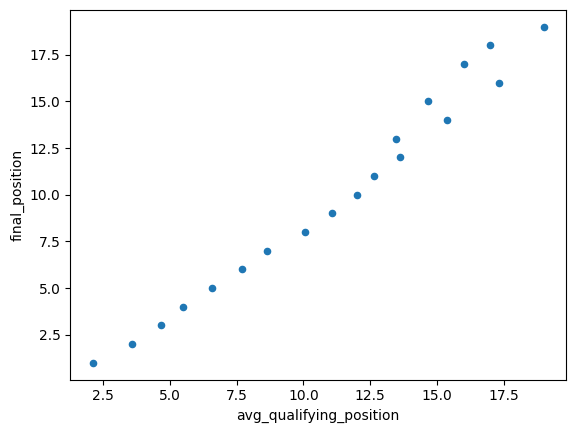

In [19]:
qualifying_influence = pd.read_sql_query('SELECT AVG(qualifying_position) AS avg_qualifying_position, final_position FROM formula_one GROUP BY final_position', conn)

display(qualifying_influence)

qualifying_influence.plot(kind='scatter', x='avg_qualifying_position', y='final_position')

### Which drivers are the most consistent across races

In [20]:
dftest = df.groupby(['driverId','driver_name'], as_index=False)['final_position'].std()
stdPosition = dftest.rename(columns={'final_position': 'std_position'})
stdPosition= stdPosition.sort_values(by='std_position')
stdPosition = stdPosition.dropna()
print(stdPosition)
# Dropped any values with NaN as a value because this indicates that the person has only raced once.
# The lower the std_position (closer to 0) indicates that they are more consistent, so in this case the most consistent drivers are brendon Hartley, and Jules Bianchi

    driverId       driver_name  std_position
50       843   Brendon Hartley      0.000000
35       824     Jules Bianchi      0.000000
52       845   Sergey Sirotkin      0.707107
30       819       Charles Pic      0.816497
7         10        Timo Glock      1.414214
..       ...               ...           ...
55       848   Alexander Albon      3.731850
28       817  Daniel Ricciardo      3.904548
22       808     Vitaly Petrov      3.968627
33       822   Valtteri Bottas      3.972917
63       856     Nyck de Vries      4.041452

[61 rows x 3 columns]


### Which drivers gain or lose the most position during races


,Avg_diff,final_position
0,1.102941,1.0
1,1.588235,2.0
2,1.658088,3.0
3,1.468165,4.0
4,1.566406,5.0
5,1.678715,6.0
6,1.644144,7.0
7,2.064039,8.0
8,2.070270,9.0
9,2.019481,10.0


<Axes: xlabel='Avg_diff', ylabel='final_position'>

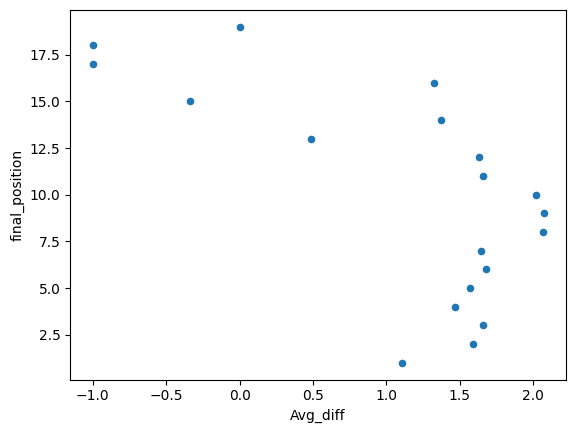

In [21]:
avg_diff = pd.read_sql_query("""
                            SELECT AVG((qualifying_position - final_position)) as Avg_diff, final_position
                            FROM formula_one 
                            GROUP BY final_position
                            ORDER BY final_position
                            """, conn)
display(avg_diff)
avg_diff.plot(kind='scatter', x='Avg_diff', y='final_position')

### How does the average number of pit stops influence the final race position?

,avg_num_stops,final_position
0,1.000000,18.0
1,1.000000,19.0
2,1.011719,5.0
3,1.020080,6.0
4,1.022059,1.0
5,1.022059,2.0
6,1.022059,3.0
7,1.022472,4.0
8,1.027027,7.0
9,1.028986,11.0


<Axes: xlabel='avg_num_stops', ylabel='final_position'>

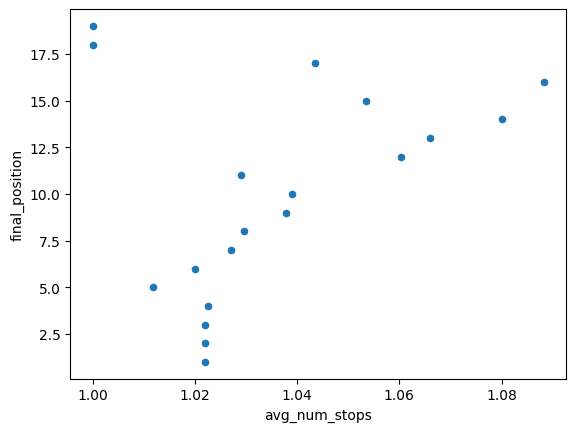

In [22]:
num_stop_influence = pd.read_sql_query(
    """
    SELECT
        AVG(pit_stop) as avg_num_stops,
        final_position
    FROM 
        formula_one
    GROUP BY
        final_position
    ORDER BY
        avg_num_stops
    """, conn)
display(num_stop_influence)
num_stop_influence.plot(kind='scatter', x='avg_num_stops', y='final_position')

### How does accumulating points over a year influence the driver's final position?

,raceId,driverId,year,driver_points,final_position
0,860,818,2012,0.0,11.0
1,880,815,2013,0.0,11.0
2,948,835,2016,0.0,11.0
3,974,835,2017,0.0,11.0
4,989,815,2018,0.0,11.0
...,...,...,...,...,...
235,1121,830,2024,26.0,1.0
236,883,13,2013,30.0,15.0
237,974,815,2017,34.0,13.0
238,931,822,2015,42.0,14.0


<Axes: xlabel='driver_points', ylabel='final_position'>

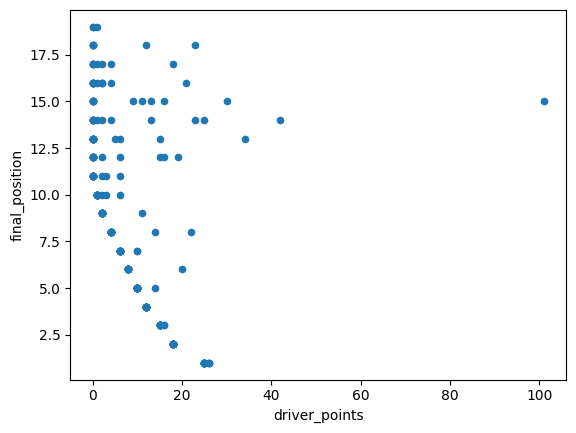

In [23]:
points_influence = pd.read_sql_query(
    """
    SELECT
        raceId,
        driverId,
        year,
        driver_points,
        final_position
    FROM 
        formula_one
    GROUP BY
        final_position, year
    ORDER BY
        driver_points
    """, conn)
display(points_influence)
points_influence.plot(kind='scatter', x='driver_points', y='final_position')

### How does the constructor influence driver performance?

In [24]:
constructor_influence = pd.read_sql_query('SELECT constructor_name, AVG(final_position) AS avg_final_position FROM formula_one GROUP BY constructor_name', conn)
display(constructor_influence)

,constructor_name,avg_final_position
0,Alfa Romeo,11.333333
1,AlphaTauri,9.721519
2,Alpine F1 Team,8.206897
3,Aston Martin,8.483146
4,Caterham,14.833333
5,Ferrari,4.609977
6,Force India,8.135294
7,HRT,17.000000
8,Haas F1 Team,11.100000
9,Lotus,18.500000


### Do specific circuits influence drivers' final positions

In [25]:
circuit_influence = pd.read_sql_query('SELECT circuitId, final_position, driver_name, circuit_name FROM formula_one GROUP BY circuit_name, final_position',conn)
display(circuit_influence)
#circuit_influence.to_csv('file1.csv')

,circuitId,final_position,driver_name,circuit_name
0,9,1.0,Max Verstappen,70th Anniversary Grand Prix
1,9,2.0,Lewis Hamilton,70th Anniversary Grand Prix
2,9,3.0,Valtteri Bottas,70th Anniversary Grand Prix
3,9,4.0,Charles Leclerc,70th Anniversary Grand Prix
4,9,5.0,Alexander Albon,70th Anniversary Grand Prix
...,...,...,...,...
607,69,13.0,Nico Rosberg,United States Grand Prix
608,69,14.0,Esteban Gutiérrez,United States Grand Prix
609,69,15.0,Heikki Kovalainen,United States Grand Prix
610,69,16.0,Paul di Resta,United States Grand Prix


### How does the average lap times influence the driver’s final position?

,final_position,avg_lap_time,circuit,year
0,1.0,110984.0,Abu Dhabi Grand Prix,2011
1,2.0,113560.0,Abu Dhabi Grand Prix,2011
2,3.0,114263.0,Abu Dhabi Grand Prix,2011
3,4.0,114836.0,Abu Dhabi Grand Prix,2011
4,5.0,115291.0,Abu Dhabi Grand Prix,2011
...,...,...,...,...
2889,7.0,87073.0,Spanish Grand Prix,2024
2890,8.0,88615.0,Spanish Grand Prix,2024
2891,9.0,86584.0,Spanish Grand Prix,2024
2892,10.0,87460.0,Spanish Grand Prix,2024


<Axes: title={'center': 'Average Lap Time by Final Position at Spanish Grand Prix 2024'}, xlabel='avg_lap_time', ylabel='final_position'>

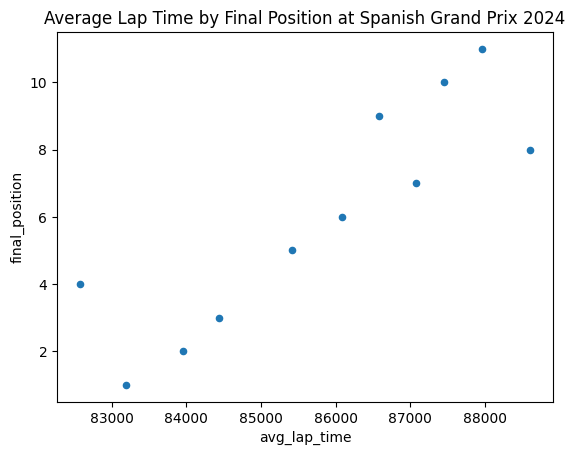

In [26]:
#avg_lap_time_influence = pd.read_sql_query('SELECT AVG(lap_time_milliseconds) AS avg_lap_time, final_position FROM formula_one GROUP BY final_position', conn)
#display(avg_lap_time_influence)

avg_lap_time_influence = pd.read_sql_query('SELECT final_position, AVG(lap_time_milliseconds) AS avg_lap_time, circuit_name AS circuit, year as year FROM formula_one GROUP BY circuit_name, year, final_position ORDER BY year',conn)
display(avg_lap_time_influence)

filtered_avg_lap_time = avg_lap_time_influence[(avg_lap_time_influence['circuit'] == 'Spanish Grand Prix') & (avg_lap_time_influence['year'] == 2024)]

filtered_avg_lap_time.plot(kind='scatter',x='avg_lap_time', y = 'final_position', title='Average Lap Time by Final Position at Spanish Grand Prix 2024') 

### Which drivers have the most consistent lap times per race

In [27]:
data = pd.read_sql_query('SELECT circuit_name,driver_name, lap_time_milliseconds FROM formula_one', conn)

grouped_data = data.groupby(['driver_name','circuit_name']).agg(
    # lap_time_avg=('lap_time_milliseconds', 'mean'),  
    lap_time_standarddev=('lap_time_milliseconds', 'std') 
).reset_index()

grouped_data = grouped_data.sort_values(by='circuit_name')
grouped_data = grouped_data.dropna()

print(grouped_data)

             driver_name              circuit_name  lap_time_standarddev
618          Mark Webber      Abu Dhabi Grand Prix           1418.456203
644       Max Verstappen      Abu Dhabi Grand Prix          20418.968905
527         Lando Norris      Abu Dhabi Grand Prix           6387.393991
679   Michael Schumacher      Abu Dhabi Grand Prix           2141.119333
498         Lance Stroll      Abu Dhabi Grand Prix           7052.186966
...                  ...                       ...                   ...
496       Kimi Räikkönen  United States Grand Prix           7544.381552
1033     Valtteri Bottas  United States Grand Prix           7723.812992
467      Kevin Magnussen  United States Grand Prix           2144.654867
391     Jean-Éric Vergne  United States Grand Prix           8450.633142
1059        Yuki Tsunoda  United States Grand Prix           1701.298916

[619 rows x 3 columns]


### How does the average pit stop duration influence the driver’s final position?

,avg_stop_duration,final_position
0,22764.333333,19.0
1,26585.166667,18.0
2,35883.294118,16.0
3,42333.869565,17.0
4,63437.604396,13.0
5,68150.053571,15.0
6,71333.810345,12.0
7,73829.525974,10.0
8,75068.840580,11.0
9,78734.519531,5.0


<Axes: xlabel='avg_stop_duration', ylabel='final_position'>

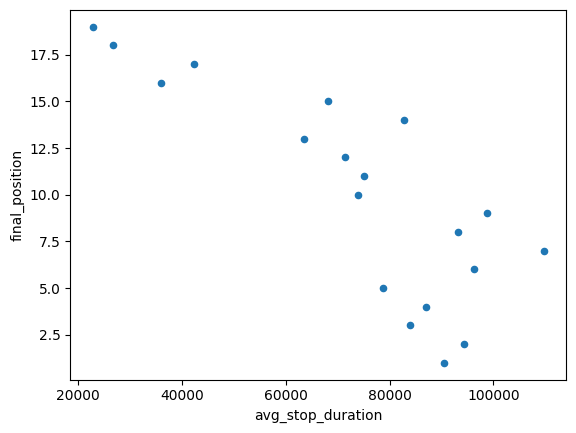

In [28]:
stop_duration_influence = pd.read_sql_query(
    """
    SELECT
        AVG(stop_duration) AS avg_stop_duration,
        final_position
    FROM 
        formula_one
    GROUP BY
        final_position
    ORDER BY
        avg_stop_duration
    """, conn)
display(stop_duration_influence)
stop_duration_influence.plot(kind='scatter', x='avg_stop_duration', y='final_position')


### How do constructor points influence the final position of a driver?

,constructor_name,constructor_points,final_position
0,Red Bull,860.0,1.0
1,Red Bull,860.0,4.0
2,Red Bull,822.0,1.0
3,Red Bull,822.0,3.0
4,Red Bull,782.0,1.0
...,...,...,...
2889,Williams,0.0,17.0
2890,Lotus,0.0,18.0
2891,Caterham,0.0,18.0
2892,Williams,0.0,18.0


<Axes: xlabel='constructor_points', ylabel='final_position'>

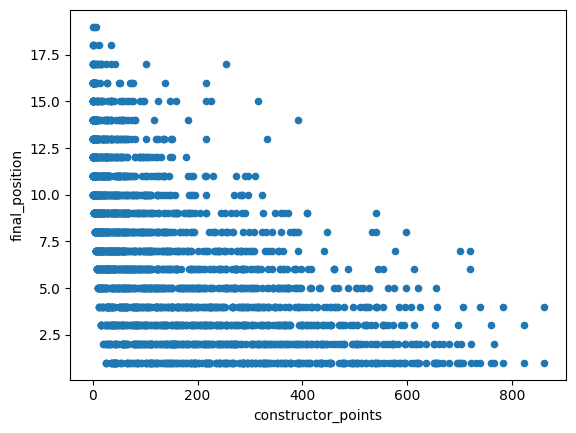

In [29]:
constructor_points_influence = pd.read_sql_query('SELECT constructor_name, constructor_points, final_position FROM formula_one ORDER BY constructor_points DESC, final_position ASC;',conn)
display(constructor_points_influence)
constructor_points_influence.plot(kind='scatter', x='constructor_points', y='final_position')

### Are drivers with a higher number of wins more likely to achieve better final positions?

,driverId,driver_name,total_wins,final_position
0,1,Lewis Hamilton,89,1.0
1,830,Max Verstappen,60,1.0
2,20,Sebastian Vettel,43,1.0
3,3,Nico Rosberg,23,1.0
4,822,Valtteri Bottas,10,1.0
...,...,...,...,...
555,848,Alexander Albon,1,18.0
556,856,Nyck de Vries,1,18.0
557,15,Jarno Trulli,1,19.0
558,825,Kevin Magnussen,1,19.0


,driver_name,total_wins,total_races,final_position
0,Lewis Hamilton,472,89,1.0
1,Max Verstappen,403,60,1.0
2,Sebastian Vettel,209,43,1.0
3,Lewis Hamilton,146,43,2.0
4,Nico Rosberg,85,23,1.0
...,...,...,...,...
555,Yuki Tsunoda,0,4,12.0
556,Yuki Tsunoda,0,1,13.0
557,Yuki Tsunoda,0,3,14.0
558,Yuki Tsunoda,0,1,15.0


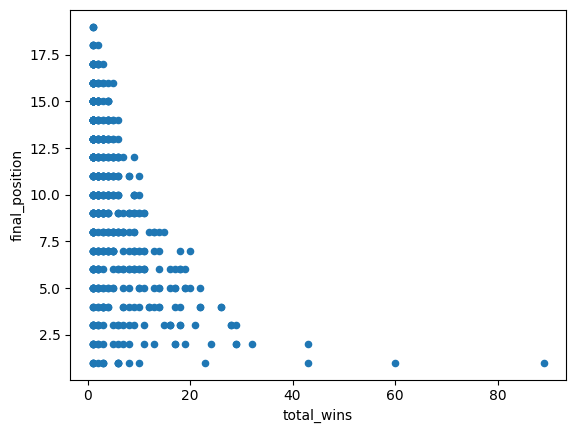

In [30]:
driver_win_influence = pd.read_sql_query('SELECT driverId, driver_name, COUNT(driver_wins) as total_wins, final_position FROM formula_one GROUP BY driverId, driver_name, final_position ORDER BY final_position, total_wins DESC',conn)
display(driver_win_influence)
#driver_win_influence.to_csv('file1.csv')
driver_win_influence.plot(kind='scatter', x='total_wins', y='final_position')

dd = pd.read_sql_query("""
                       SELECT driver_name, SUM(driver_wins) AS total_wins, COUNT(driver_wins) AS total_races, final_position
                       FROM formula_one
                       GROUP BY driver_name, final_position
                       ORDER BY total_wins DESC
                       """, conn)
display(dd)
# dd.plot(kind='scatter', x='win_rate', y='avg_final')


### Does starting grid position influence a driver's final race position?

,starting_grid_position,final_position
0,2.161765,1.0
1,3.452206,2.0
2,4.845588,3.0
3,5.782772,4.0
4,6.867188,5.0
5,7.771084,6.0
6,8.581081,7.0
7,10.246305,8.0
8,11.021622,9.0
9,11.961039,10.0


<Axes: xlabel='starting_grid_position', ylabel='final_position'>

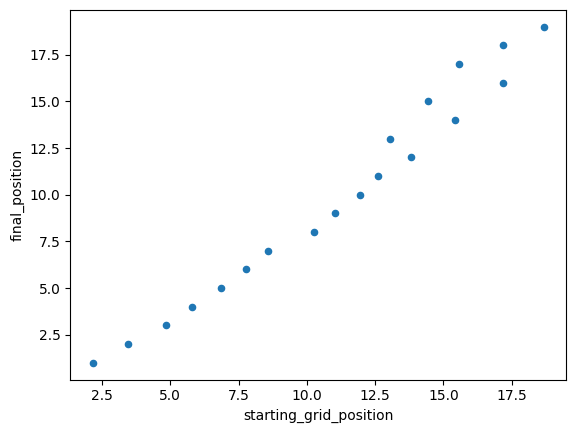

In [31]:
grid_position_influence = pd.read_sql_query('SELECT AVG(starting_grid) as starting_grid_position, final_position FROM formula_one GROUP BY final_position ',conn)
display(grid_position_influence)
grid_position_influence.plot(kind='scatter', x='starting_grid_position', y='final_position')
#grid_position_influence.to_csv('file1.csv')

### What are the strongest correlations between features and final race position?

In [32]:
# Calculate correlations
qualifying_correlation = qualifying_influence['avg_qualifying_position'].corr(qualifying_influence['final_position'])
print("Correlation between Average Qualifying Position and Final Position: r =", qualifying_correlation)

avg_num_stop_correlation = num_stop_influence['avg_num_stops'].corr(num_stop_influence['final_position'])
print("Correlation between Average Number of Pit Stops and Final Position: r =", avg_num_stop_correlation )

points_correlation = points_influence['driver_points'].corr(points_influence['final_position'])
print("Correlation between Accumulated Driver Points in a Year and Final Position: r =", points_correlation )

avg_stop_duration_correlation = stop_duration_influence['avg_stop_duration'].corr(stop_duration_influence['final_position'])
print("Correlation between Average Pit Stop Duration (in milliseconds) and Final Position: r =", avg_stop_duration_correlation)

constructor_points_correlation = constructor_points_influence['constructor_points'].corr(constructor_points_influence['final_position'])
print("Correlation between Constructor Points and Final Position: r =", constructor_points_correlation)

driver_win_correlation = driver_win_influence['total_wins'].corr(driver_win_influence['final_position'])
print("Correlation between Driver Wins and Final Position: r =", constructor_points_correlation)

grid_position_correlation = grid_position_influence['starting_grid_position'].corr(grid_position_influence['final_position'])
print("Correlation between Starting Grid Position and Final Position: r =", grid_position_correlation)

avg_lap_time_correlation = avg_lap_time_influence['avg_lap_time'].corr(avg_lap_time_influence['final_position'])
print("Correlation between Average Lap Time (in milliseconds) and Final Position: r =", avg_lap_time_correlation)

correlation = avg_diff['Avg_diff'].corr(avg_diff['final_position'])
print(f"Correlation between Average Difference in Qualifying and Final position and Average Final Position: r = {correlation}" )

Correlation between Average Qualifying Position and Final Position: r = 0.9890957766899194
Correlation between Average Number of Pit Stops and Final Position: r = 0.3161343620376219
Correlation between Accumulated Driver Points in a Year and Final Position: r = -0.43118873178813677
Correlation between Average Pit Stop Duration (in milliseconds) and Final Position: r = -0.813915348786526
Correlation between Constructor Points and Final Position: r = -0.5434195174463154
Correlation between Driver Wins and Final Position: r = -0.5434195174463154
Correlation between Starting Grid Position and Final Position: r = 0.9864921673137027
Correlation between Average Lap Time (in milliseconds) and Final Position: r = 0.0012423901311608635
Correlation between Average Difference in Qualifying and Final position and Average Final Position: r = -0.6579683353593052


## Merge all features into one table

In [ ]:
ml_prep = pd.read_sql_query("""
SELECT driver_name AS driver,
       circuit_name AS circuit,
       constructor_name, 
       AVG(qualifying_position) AS avg_qualifying_position,
       AVG((qualifying_position - final_position)) AS avg_diff_qual_final,
       AVG(pit_stop) AS avg_num_pit_stops,
       -- driver points over a year?
       AVG(lap_time_milliseconds) AS avg_lap_time,
       AVG(stop_duration) AS avg_stop_duration,
       constructor_points,
       avg(starting_grid) AS starting_grid_position
       FROM formula_one 
       GROUP BY driver, circuit, constructor_name
""", conn)
display(ml_prep)

,driver,circuit,constructor_name,avg_qualifying_position,avg_diff_qual_final,avg_num_pit_stops,avg_lap_time,avg_stop_duration,constructor_points,starting_grid_position
0,Adrian Sutil,Abu Dhabi Grand Prix,Force India,13.5,4.5,1.0,118784.5,21202.0,57.0,13.0
1,Adrian Sutil,Australian Grand Prix,Force India,12.0,5.0,1.0,106947.0,22693.0,10.0,12.0
2,Adrian Sutil,Bahrain Grand Prix,Force India,8.0,-5.0,1.0,163151.0,26495.0,26.0,6.0
3,Adrian Sutil,Belgian Grand Prix,Force India,13.5,5.5,1.0,126155.5,23050.0,32.0,13.5
4,Adrian Sutil,Belgian Grand Prix,Sauber,14.0,0.0,1.0,125467.0,23755.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...
1541,Yuki Tsunoda,Miami Grand Prix,RB F1 Team,10.0,3.0,1.0,101055.0,22153.0,19.0,10.0
1542,Yuki Tsunoda,Saudi Arabian Grand Prix,AlphaTauri,16.0,5.0,1.0,105589.0,21414.0,0.0,16.0
1543,Yuki Tsunoda,Spanish Grand Prix,AlphaTauri,15.0,3.0,1.0,90844.0,22176.0,2.0,15.0
1544,Yuki Tsunoda,São Paulo Grand Prix,AlphaTauri,16.0,7.0,1.0,139969.0,20969.0,21.0,16.0


### Find skewness and outliers

In [34]:
# conn.commit()
# conn.close()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#print(df.skew(numeric_only=True))
#print(df.corr(numeric_only=True))

#plt.figure(figsize=(17,12))
#sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
#plt.show()

# Linear Regression

In [36]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import LinearRegressionModel

 # create spark session
spark = SparkSession.builder.master("local").appName("Driver_Performance_Prediction").getOrCreate()

ModuleNotFoundError: No module named 'pyspark'

In [2164]:
spark.stop()